In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np



#Getting timeseries data for confirmed cases
url_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df_Confirmed=pd.read_csv(url_confirmed,error_bad_lines=False)
df_Recovered=pd.read_csv(url_recovered,error_bad_lines=False)
df_Deaths=pd.read_csv(url_deaths,error_bad_lines=False)

#creating a column to show that this is confirmed cases only
df_Confirmed['Status']='Confirmed'
df_Recovered['Status']='Recovered'
df_Deaths['Status']='Dead'


In [2]:
#List of Countries which this contains records for.

print('Countries in Analysis'+
      '\n'+(str(df_Confirmed['Country/Region'].unique())))
   # df_Confirmed['Country/Region'].unique())


number_of_unique_countries=len((df_Confirmed['Country/Region'].unique()))

countries_list=(df_Confirmed['Country/Region'].unique()).tolist()



Countries in Analysis
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyrgyzstan'

In [3]:
#Getting the List of Dates to plot too. With the plotting dates, we are only sel

plotting_dates=list(df_Confirmed[40:len(df_Confirmed)-1])
dates_to_plot=plotting_dates[4:len(plotting_dates)-1]

print('Number of Dates ' +str(len(dates_to_plot)))
print('Dates to Plot'
      '\n'+str(dates_to_plot).strip('[]'))
#print(len(list(df_Confirmed)))

Number of Dates 109
Dates to Plot
'1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0, 0.5, 'Cornfirmed Cases')

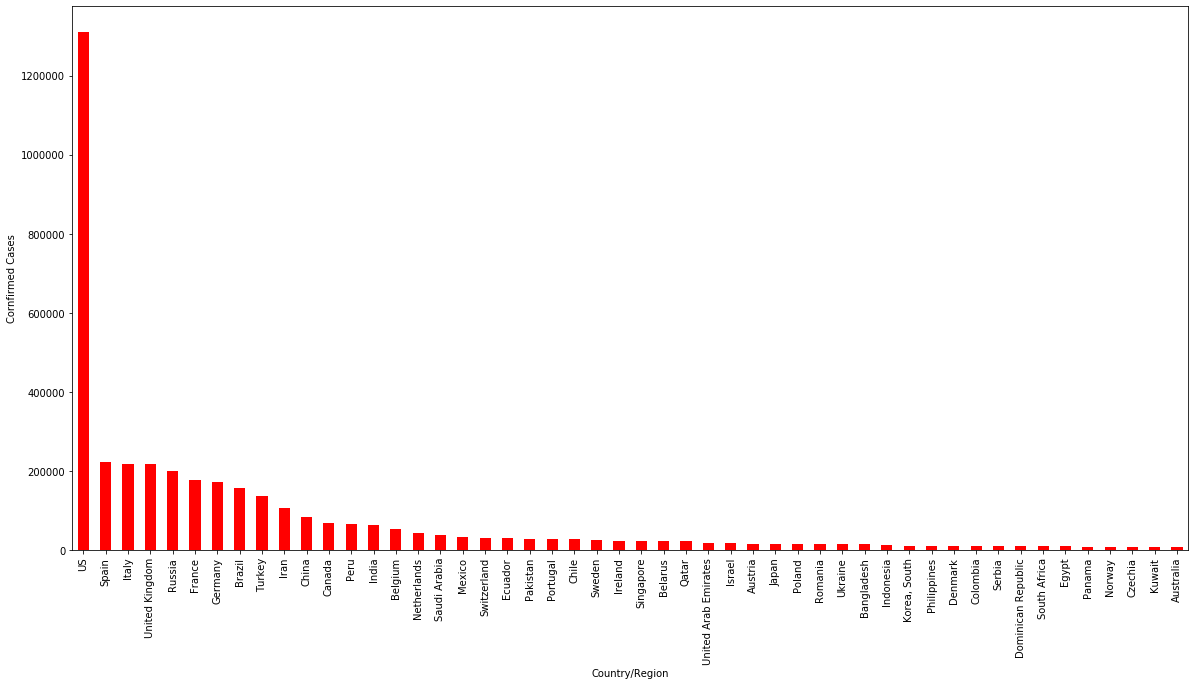

In [4]:
#Getting most recent columns to print the latest number of cases
numb_of_columns=(len(df_Confirmed.columns))
latest_column=df_Confirmed.columns[numb_of_columns-2]

today_confirmed=((df_Confirmed.groupby(['Country/Region'])[latest_column].agg('sum')).to_frame()).sort_values(by=latest_column, ascending=False)
today_confirmed=today_confirmed.reset_index()
top_50_confirmed=today_confirmed[:50]

t50p=top_50_confirmed.plot(kind='bar',x='Country/Region',y=latest_column,color='red',figsize=(20,10),legend=False)
print(type(t50p))
t50p.set_ylabel("Cornfirmed Cases")



In [5]:
#Testing to aggregate the time series values
masterdf=pd.concat([df_Confirmed,df_Recovered,df_Deaths])

df_Confirmed_agg=df_Confirmed.groupby(['Country/Region']).agg('sum')
df_Confirmed_agg=df_Confirmed_agg.reset_index()
df_Recovered_agg=df_Recovered.groupby(['Country/Region']).agg('sum')
df_Recovered_agg=df_Recovered_agg.reset_index()
df_Deaths_agg=df_Deaths.groupby(['Country/Region']).agg('sum')
df_Deaths_agg=df_Deaths_agg.reset_index()

#print(df_Deaths_agg)

In [6]:
#Creating these list without the countr/region. These will be aggregated by Sub-Region/Country

list_Confirmed_Total=(df_Confirmed_agg[latest_column]).to_numpy()
list_Confirmed_Total_Country=(df_Confirmed_agg['Country/Region']).to_numpy()
list_Confirmed_Total_Country_List=list(list_Confirmed_Total_Country)
list_Confirmed_Total_List=list(list_Confirmed_Total)
list_Deaths_Total=(df_Deaths_agg[latest_column]).to_numpy()
current_mortality_rate=list(list_Deaths_Total/list_Confirmed_Total)
#now we recreate a dataframe with country and mortality rate. 

mortality_df=pd.DataFrame({'Country/Region':list_Confirmed_Total_Country_List,
                          'Current Mortality Rate':current_mortality_rate,
                           'Confirmed':list_Confirmed_Total,
                           'Deaths':list_Deaths_Total
                          })



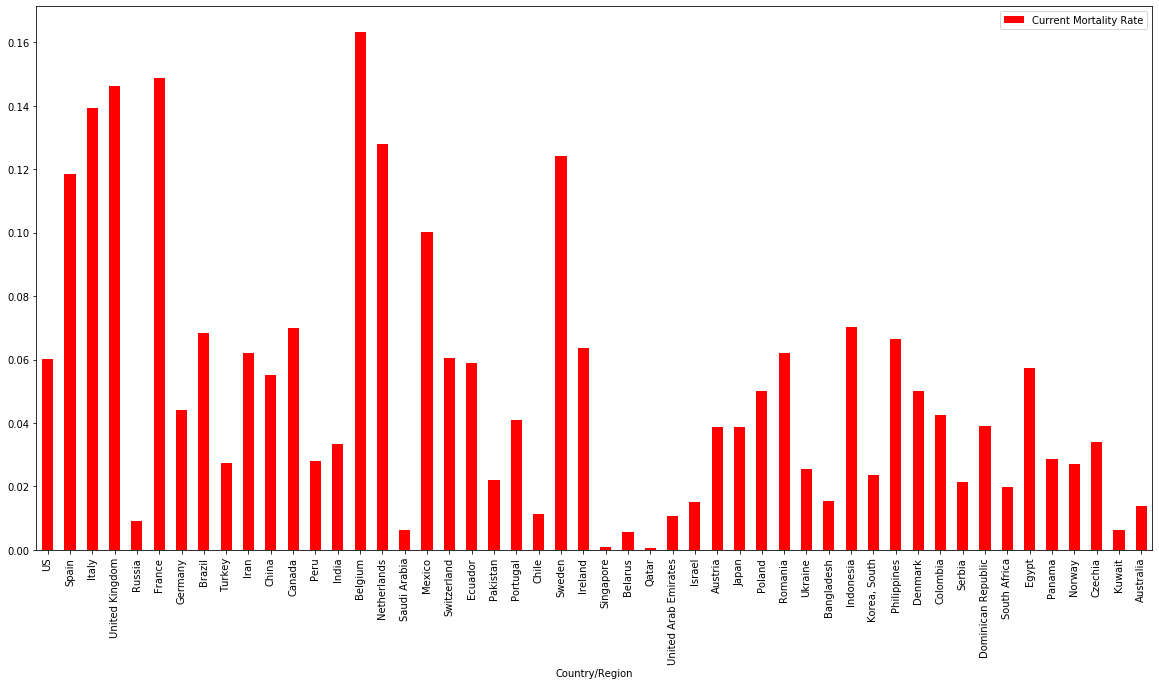

In [7]:
#we join the top 50 countries with the rate of increase
confirmed_mortality_rate_df=pd.merge(top_50_confirmed,mortality_df,on='Country/Region',how='inner')
confirmed_mortality_rate_df.plot(kind='bar',x='Country/Region',y='Current Mortality Rate',color='red',figsize=(20,10))


     Dates  Confirmed  Recovered  Dead  Mortality Rate
0  1/22/20        1.0        0.0   0.0             0.0
1  1/23/20        1.0        0.0   0.0             0.0
2  1/24/20        3.0        0.0   0.0             0.0
3  1/25/20        3.0        0.0   0.0             0.0
4  1/26/20        4.0        0.0   0.0             0.0


Text(0.5, 0, 'Dates [mm/dd/yyyy]')

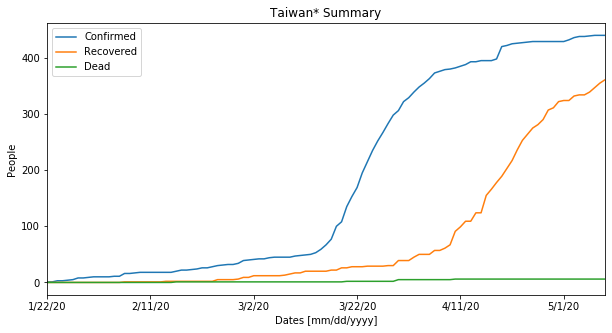

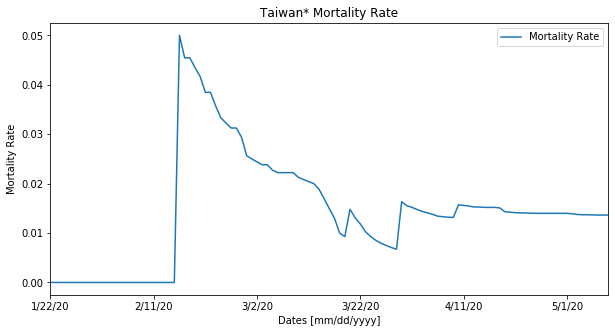

In [8]:
# print(dates_to_plot)
plotting_values=df_Confirmed[40:len(df_Confirmed)-1]

# Setting the indexs to filter on the columns
df_Confirmed_agg.set_index('Country/Region',inplace=True)
df_Recovered_agg.set_index('Country/Region',inplace=True)
df_Deaths_agg.set_index('Country/Region',inplace=True)

#print(df_Confirmed.loc['Austria'])

country='Taiwan*' 

confirmed_df=df_Confirmed_agg.loc[country].values.tolist()
confirmed_df_plot=confirmed_df[2:]

recovered_df=df_Recovered_agg.loc[country].values.tolist()
recovered_df_plot=recovered_df[2:]

Death_df=df_Deaths_agg.loc[country].values.tolist()
Death_df_plot=Death_df[2:]

#Creating one dataframe for Mortality/Dead and Confirmed

#First to find the mortality rate
a=np.array(confirmed_df_plot)
b=np.array(Death_df_plot)

mortality_rate=list(b/a)


Top_50_df=pd.DataFrame({
                        'Dates':dates_to_plot,
                        'Confirmed':confirmed_df_plot,
                        'Recovered':recovered_df_plot,
                        'Dead':Death_df_plot,
                        'Mortality Rate':mortality_rate
                          })

print(Top_50_df.head())

top_50_plt=Top_50_df.plot(kind='line',x='Dates',y=['Confirmed','Recovered','Dead'],figsize=(10,5),title=country+' Summary')
top_50_plt.set_ylabel('People')
top_50_plt.set_xlabel('Dates [mm/dd/yyyy]')

top_50_plt=Top_50_df.plot(kind='line',x='Dates',y=['Mortality Rate'],figsize=(10,5),title=country+' Mortality Rate')
top_50_plt.set_ylabel('Mortality Rate')
top_50_plt.set_xlabel('Dates [mm/dd/yyyy]')




C:\Users\mchung\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mchung\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


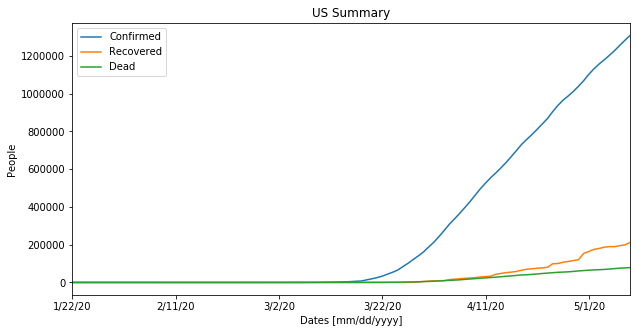

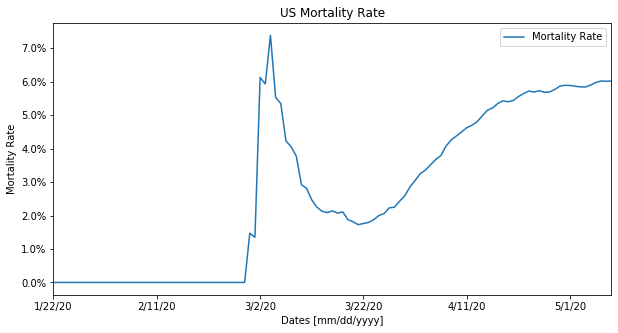

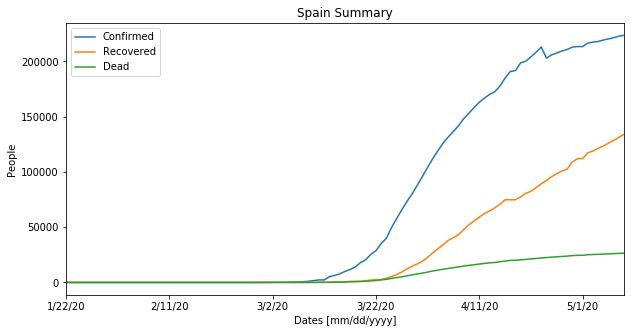

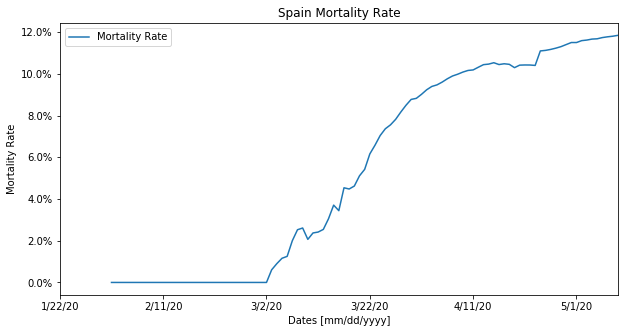

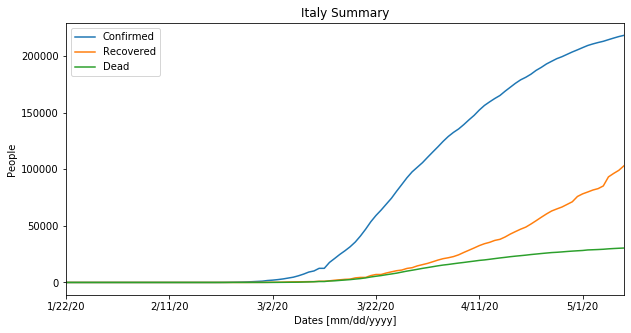

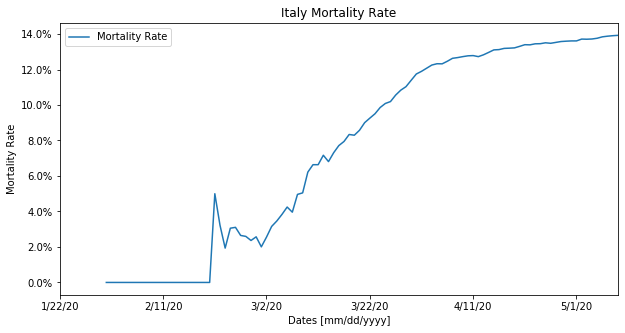

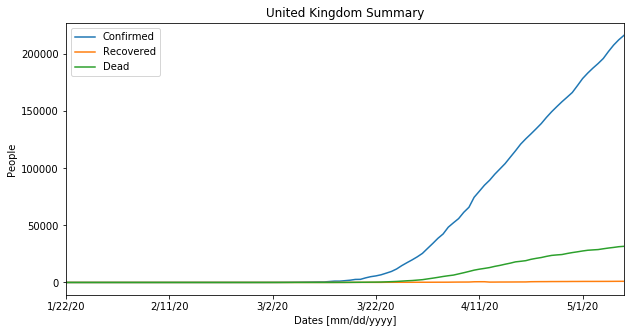

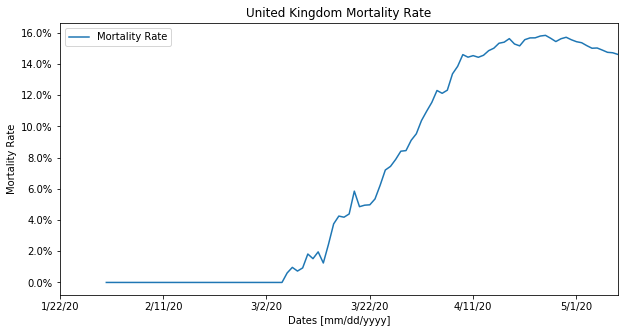

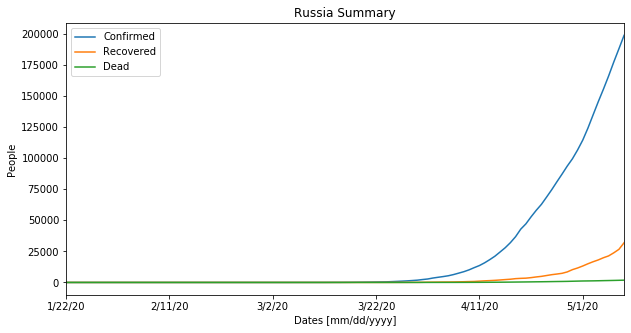

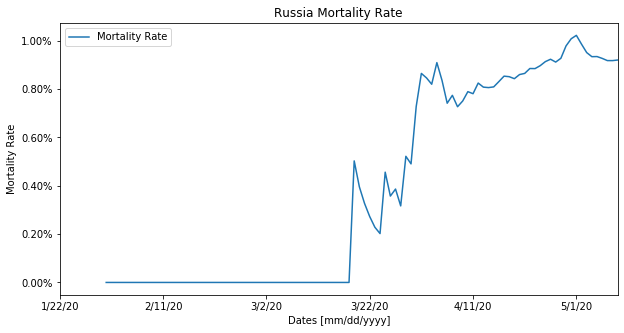

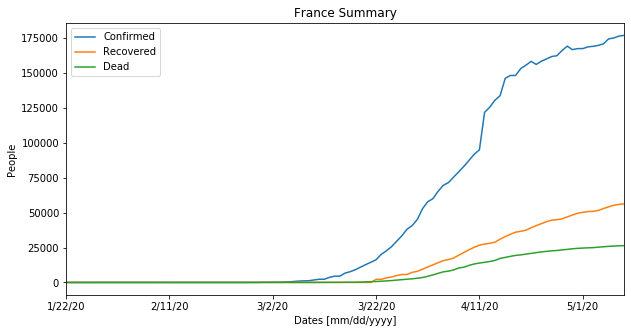

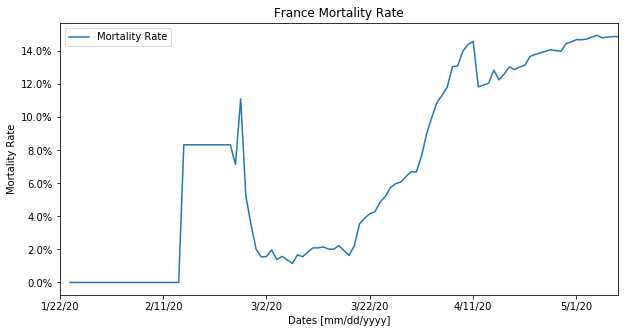

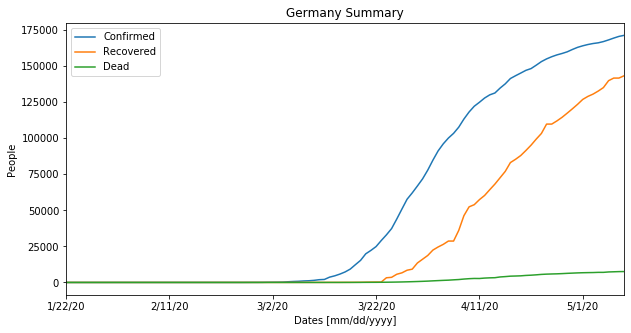

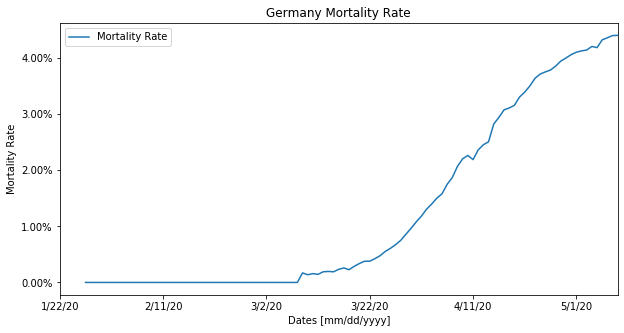

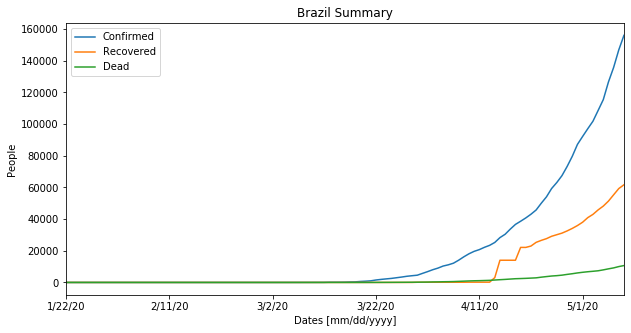

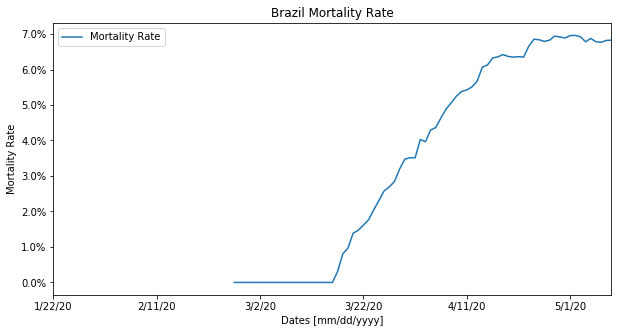

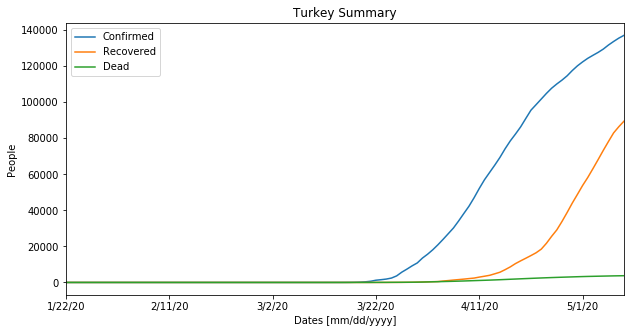

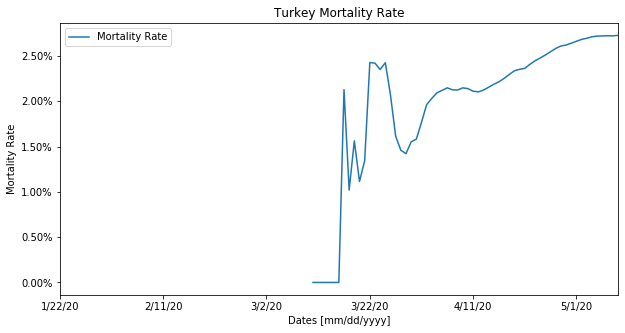

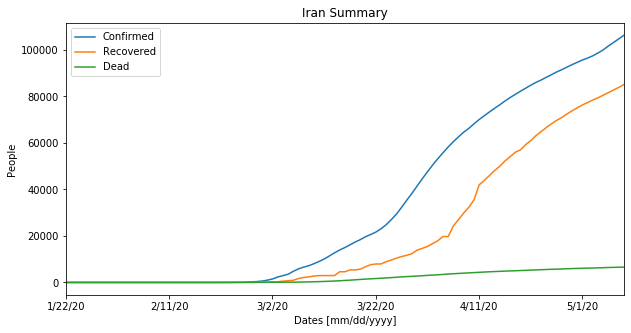

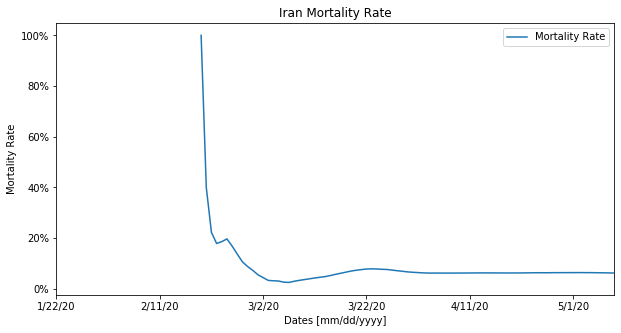

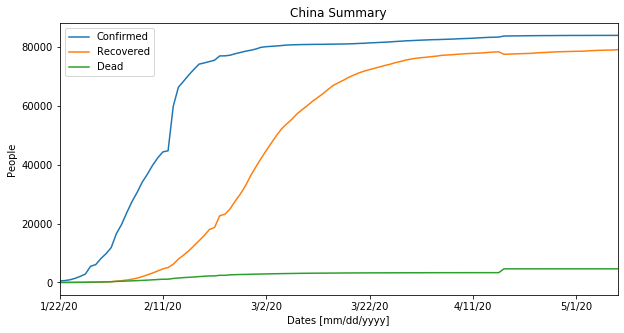

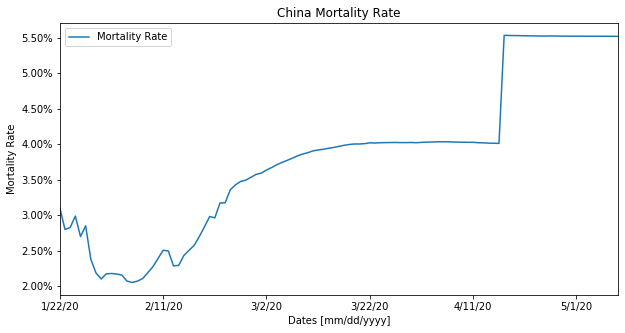

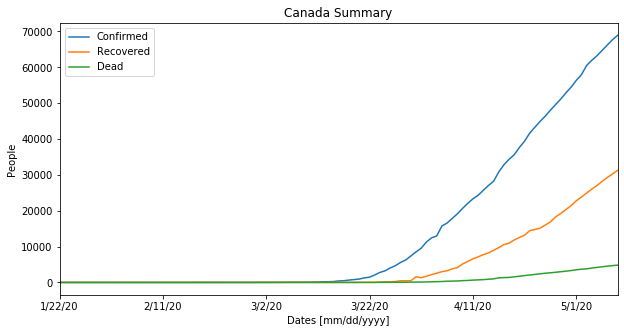

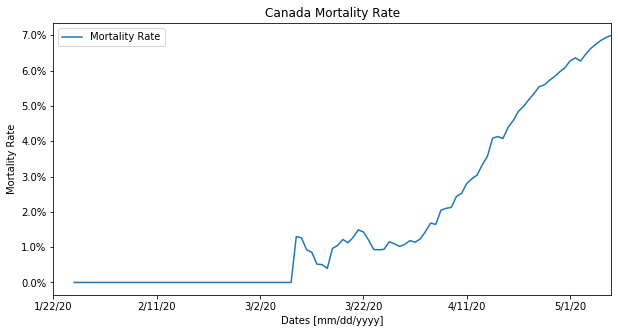

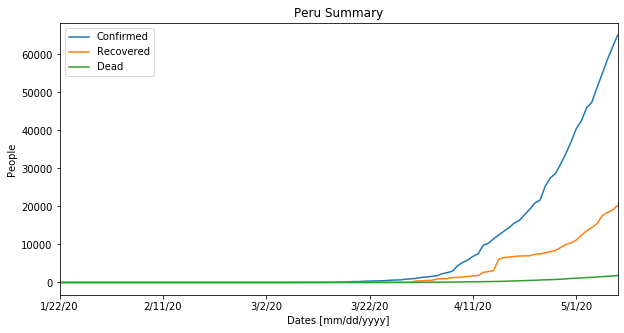

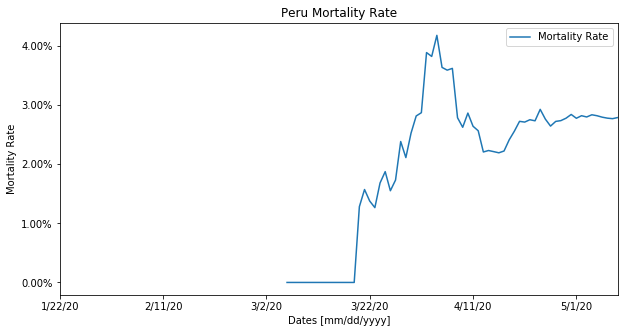

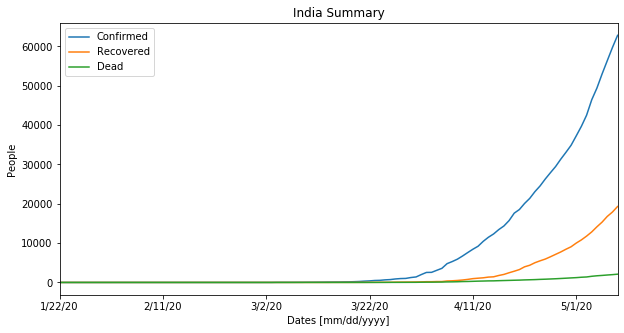

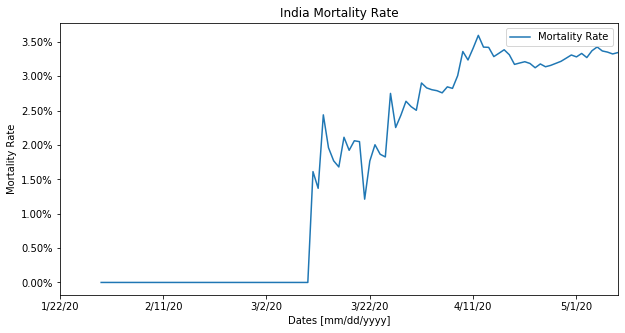

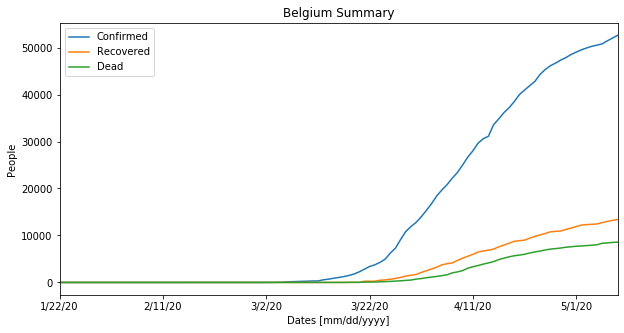

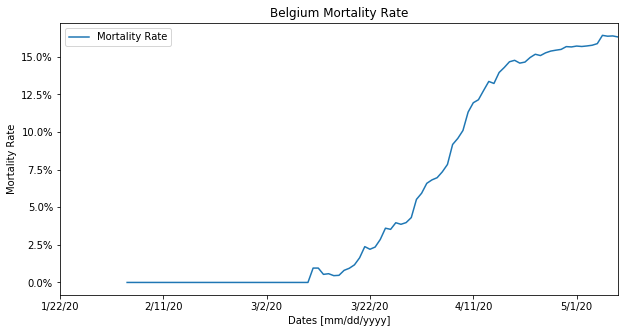

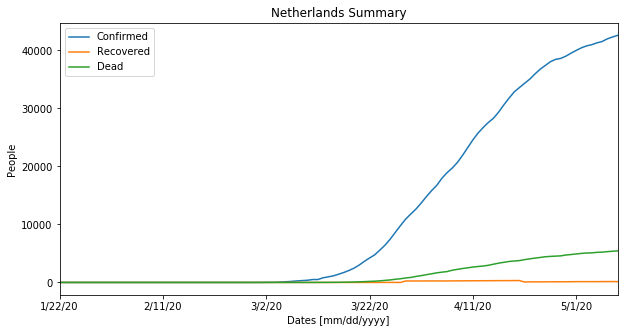

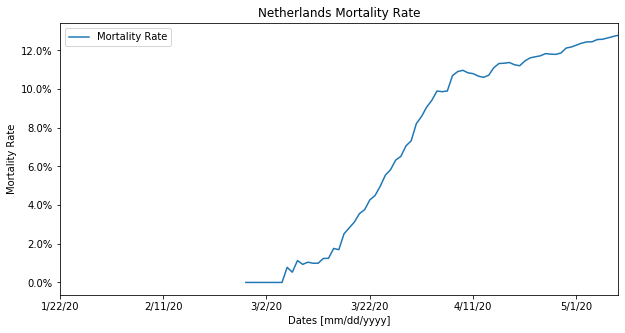

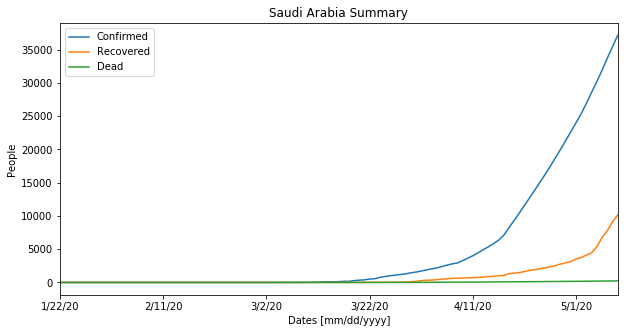

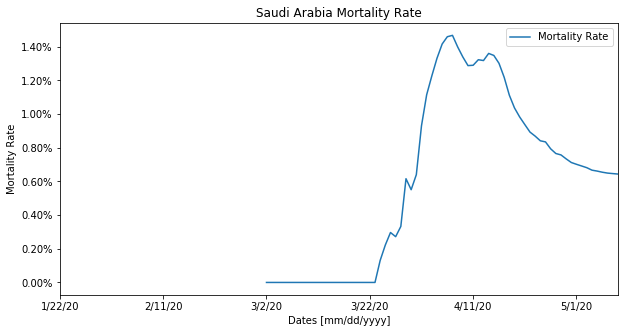

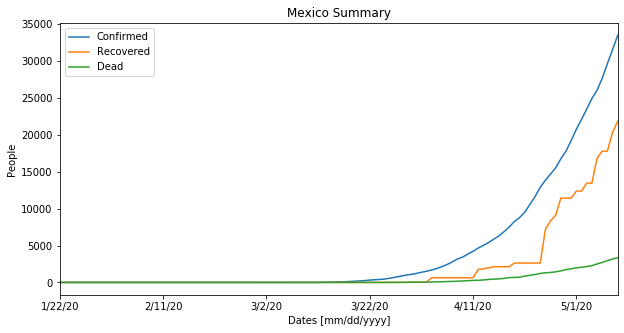

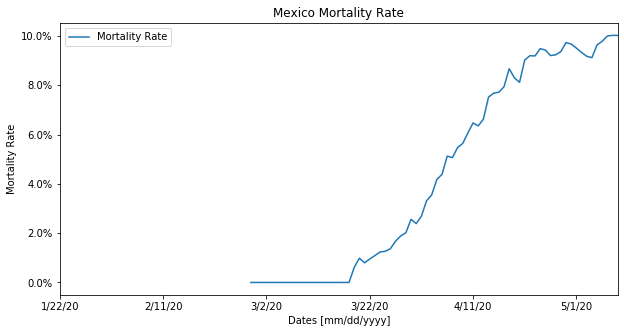

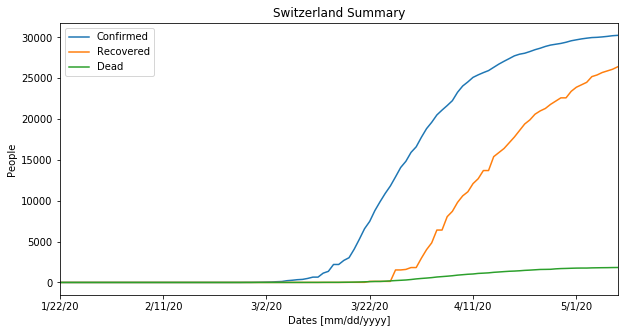

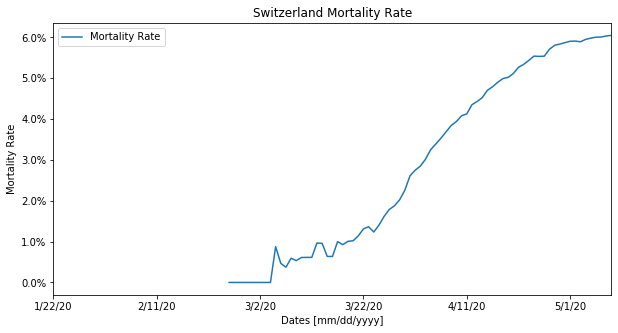

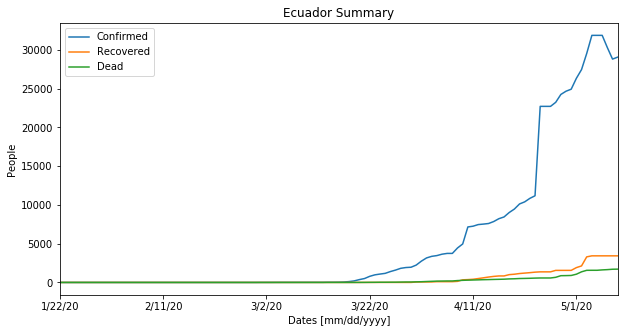

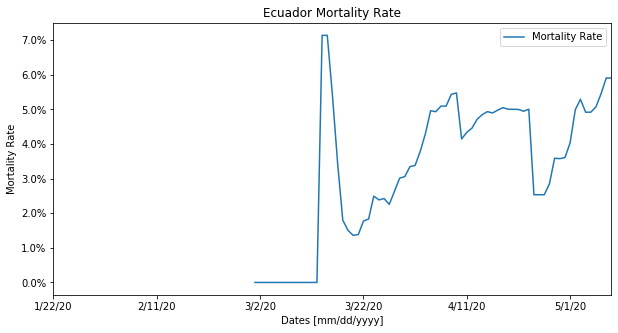

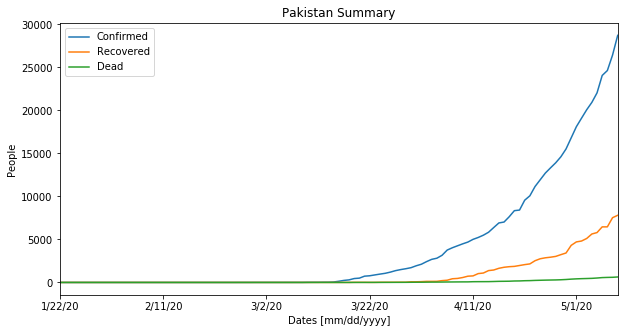

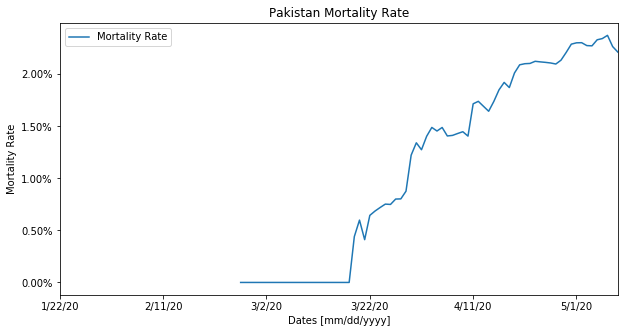

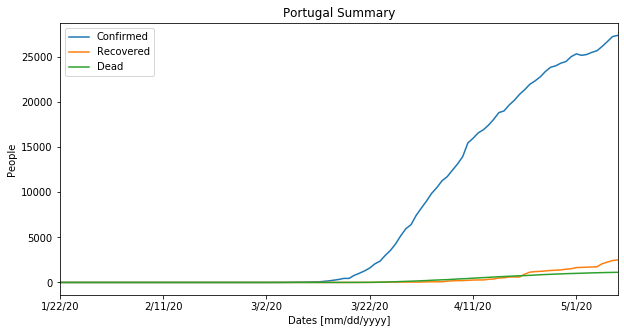

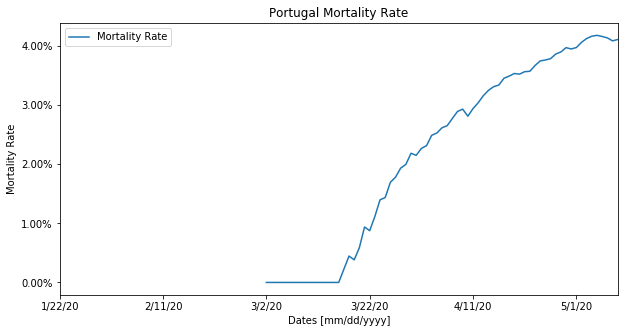

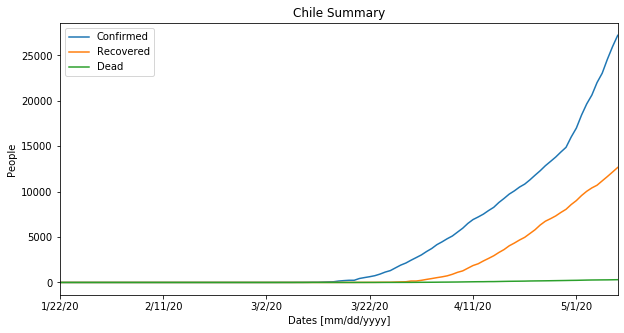

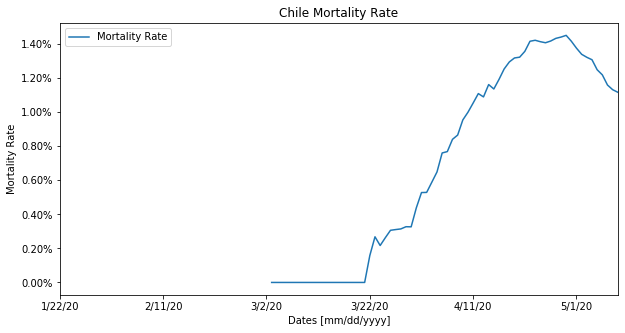

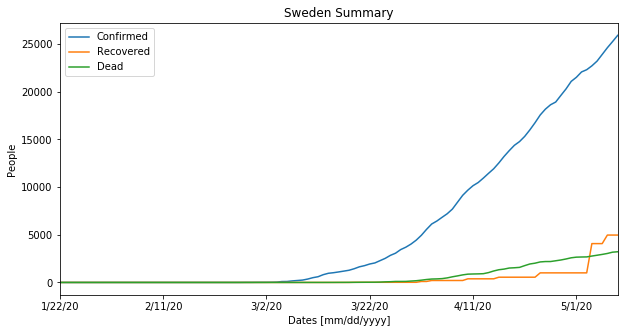

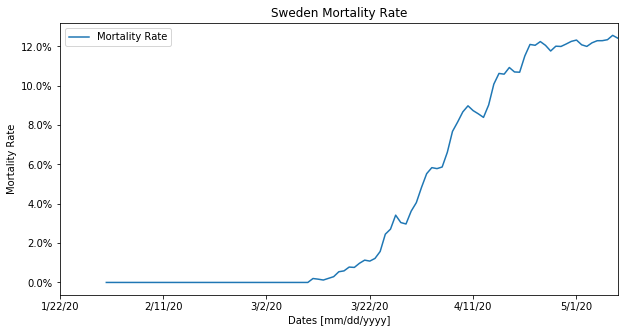

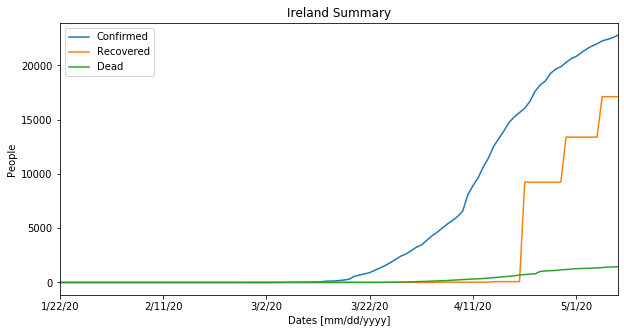

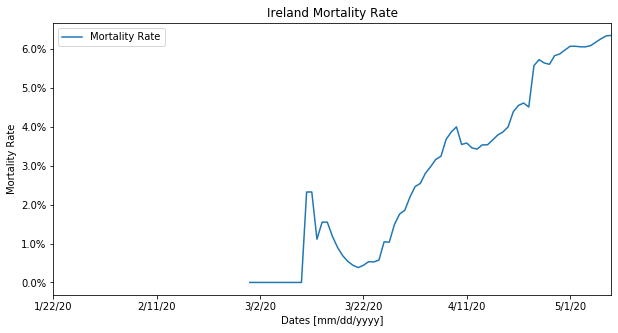

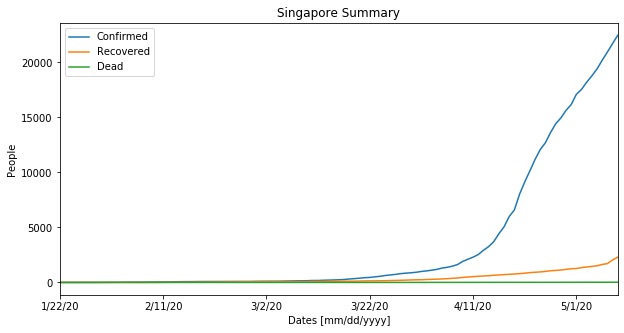

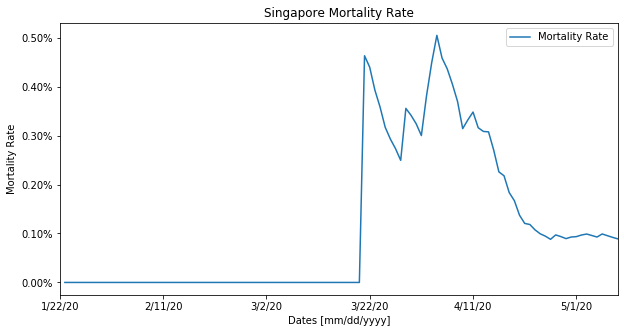

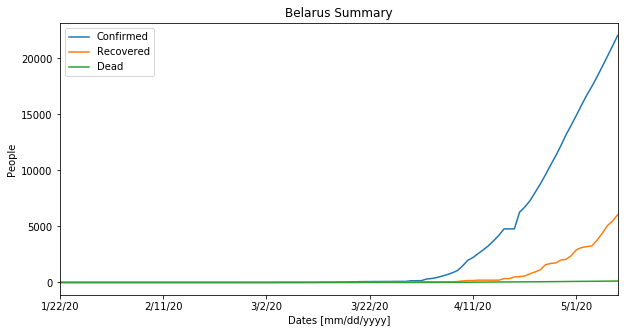

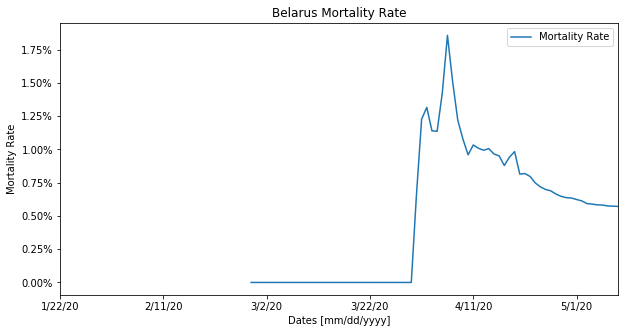

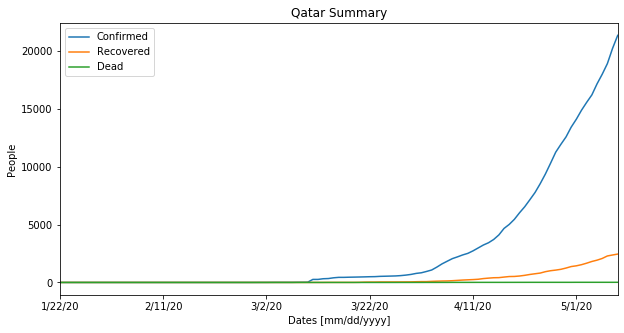

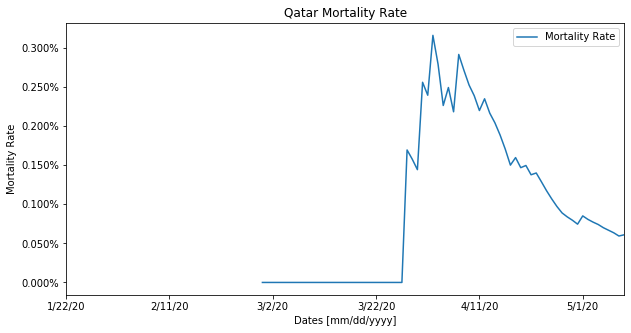

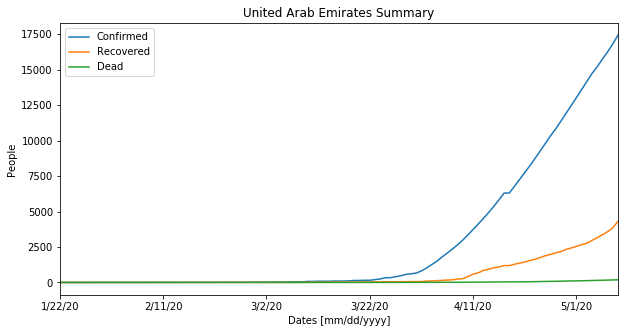

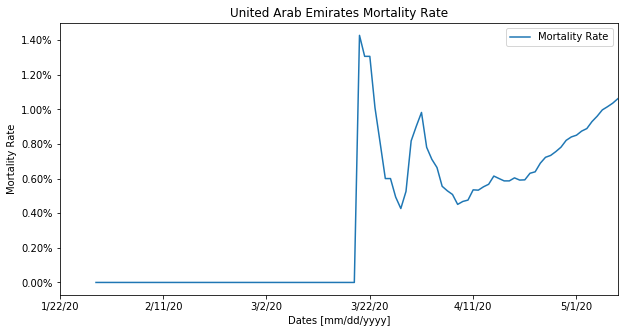

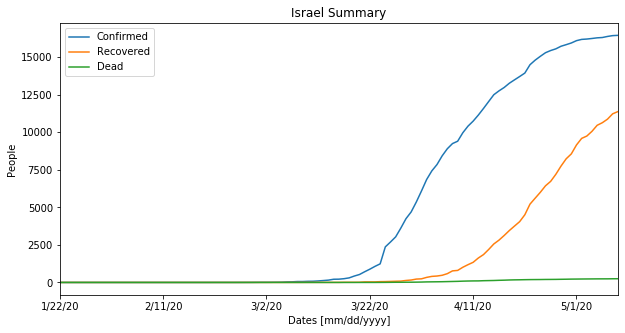

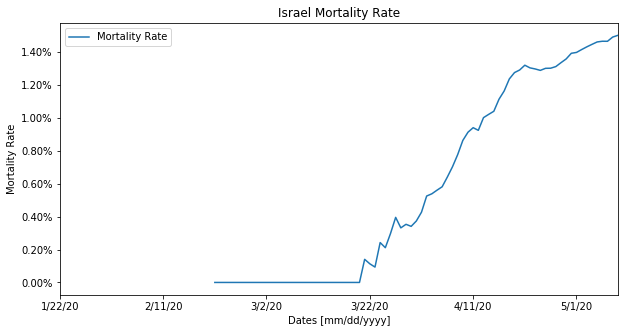

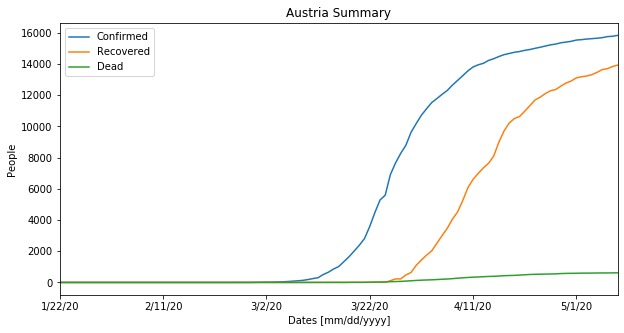

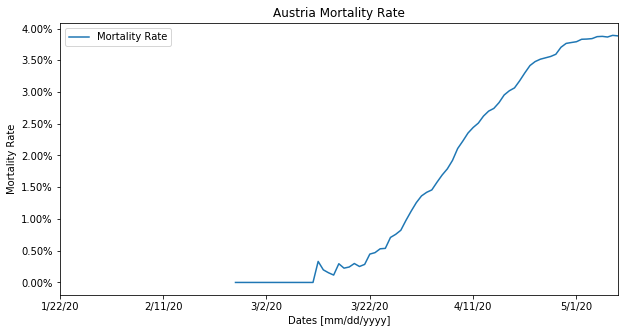

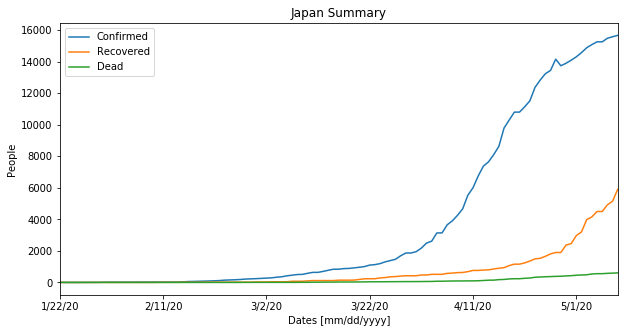

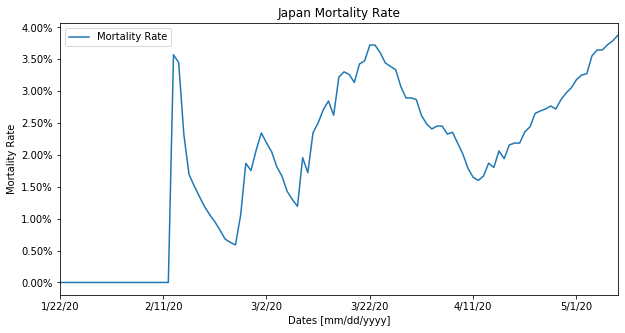

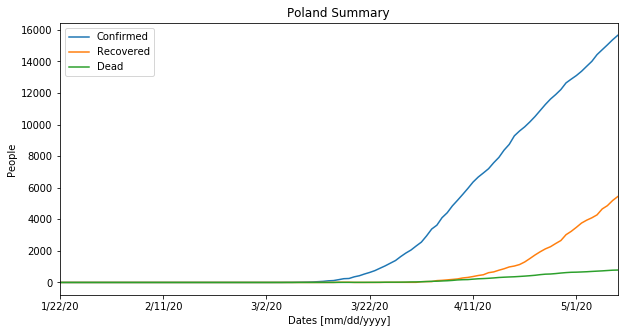

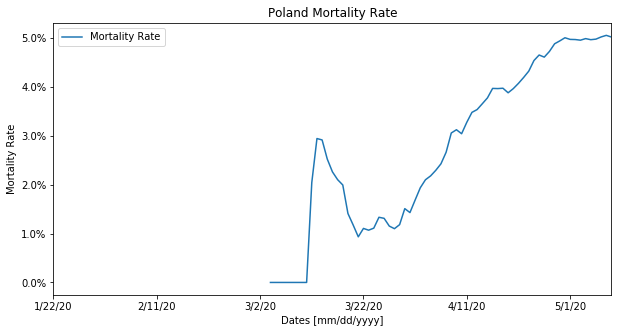

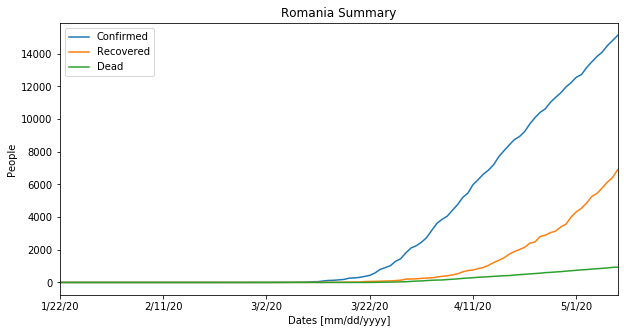

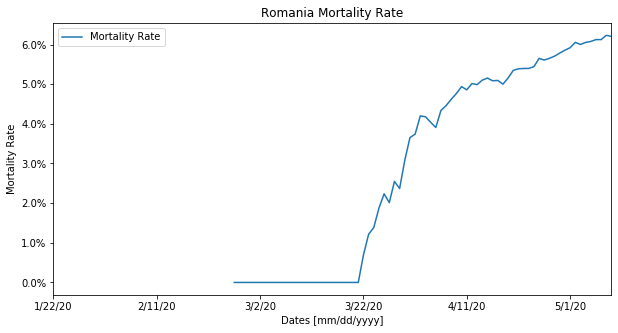

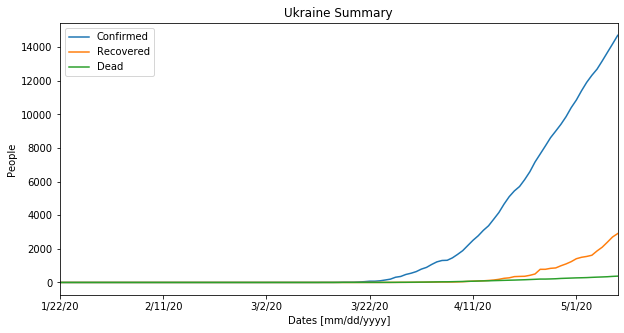

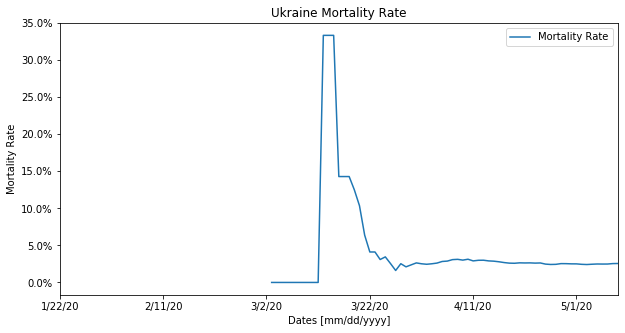

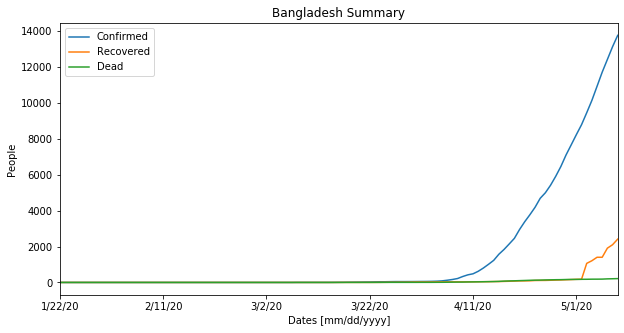

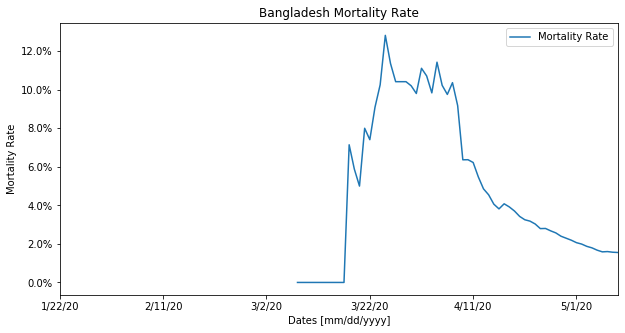

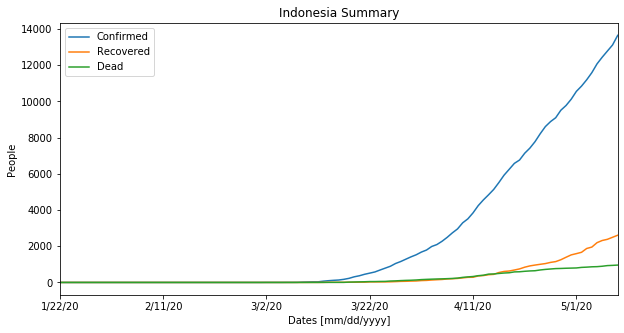

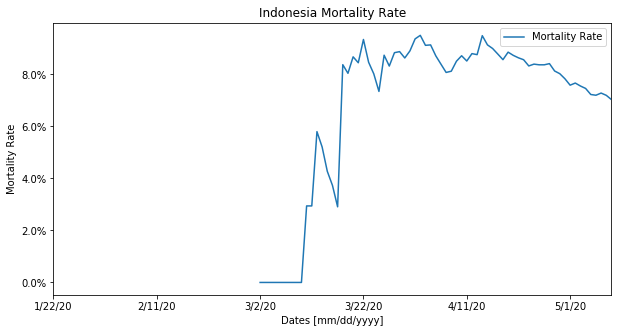

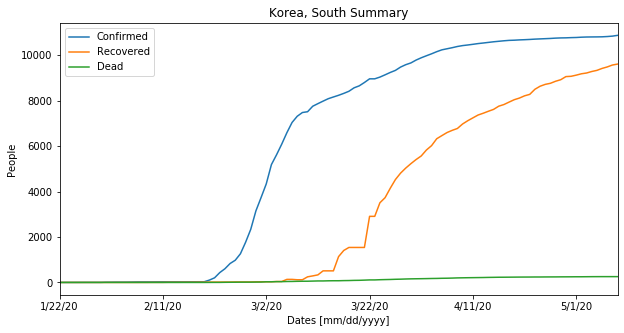

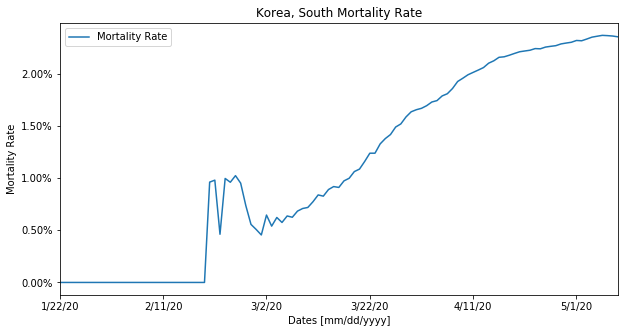

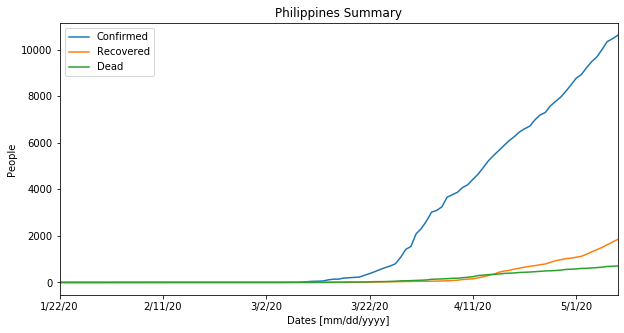

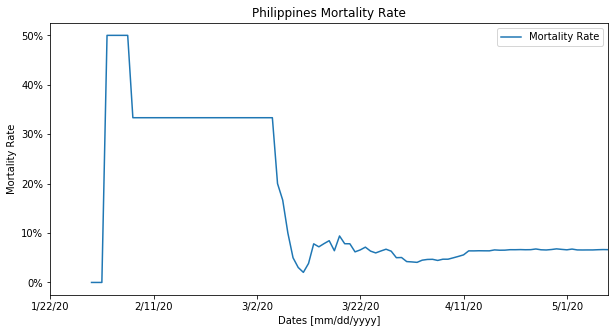

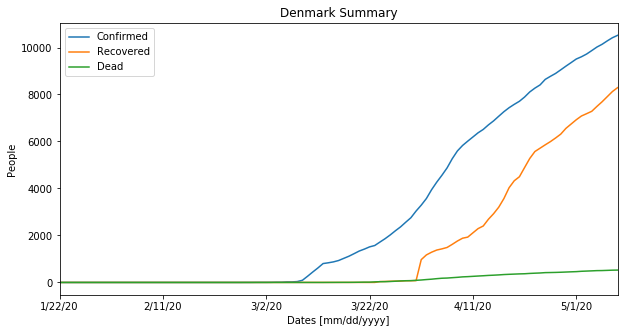

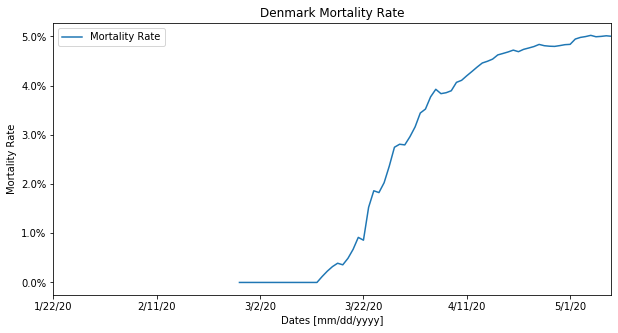

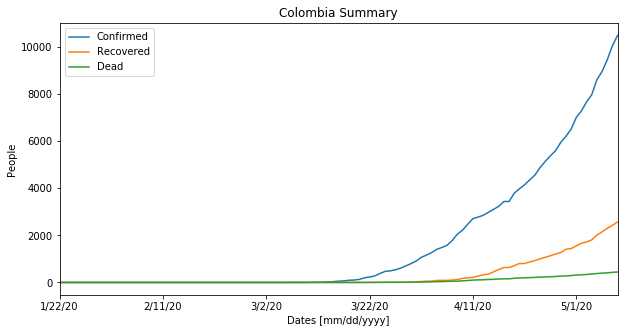

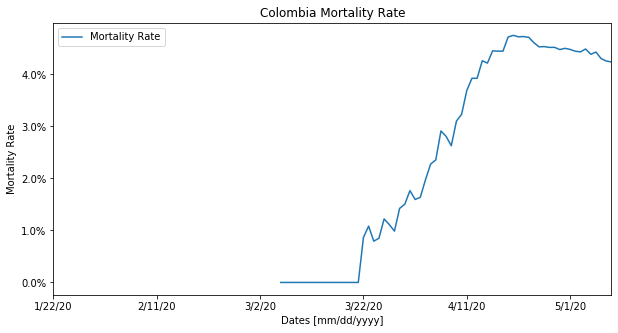

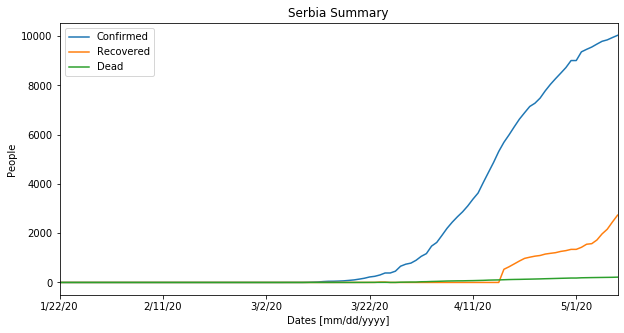

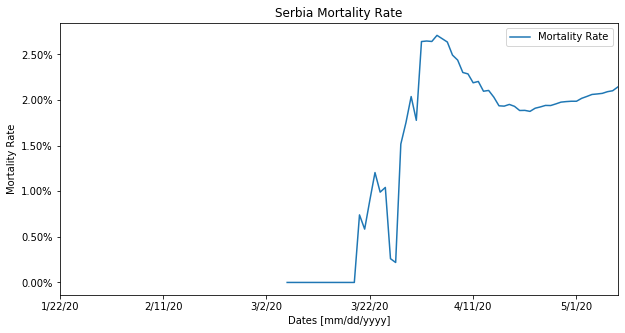

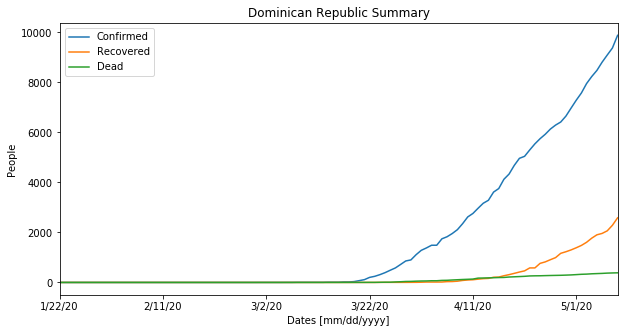

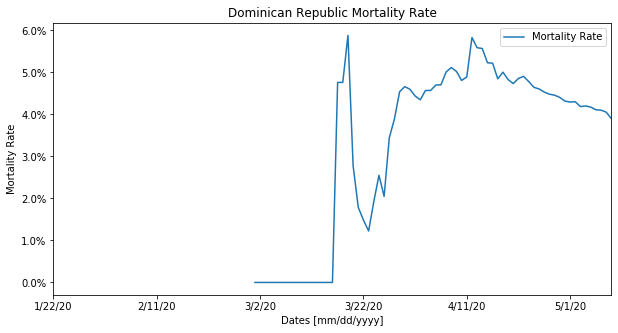

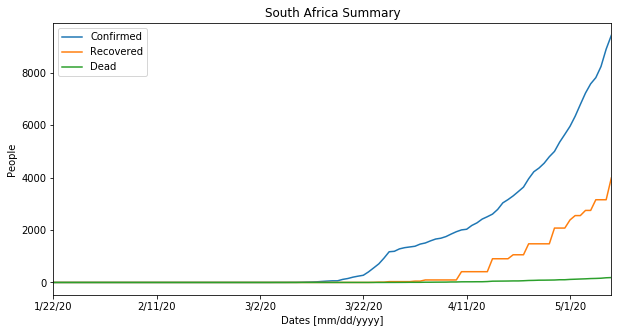

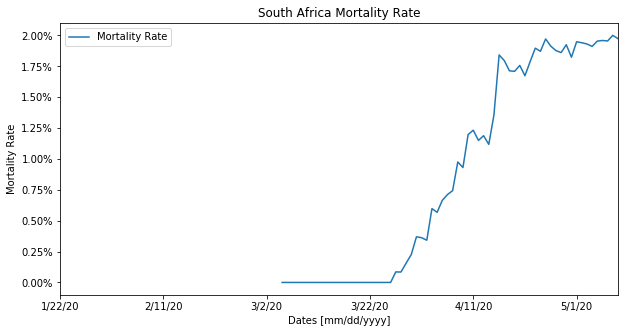

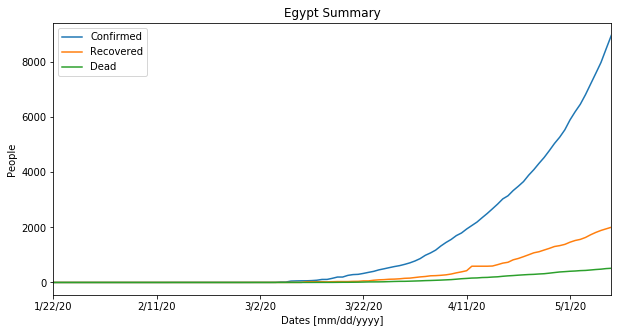

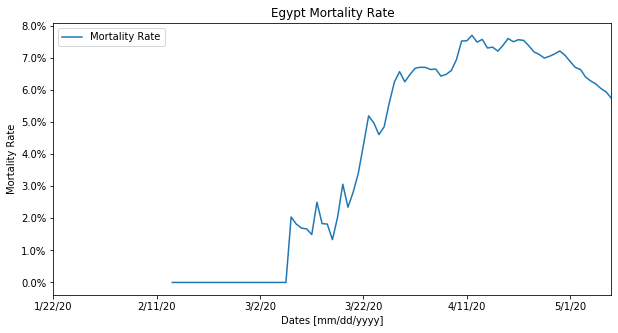

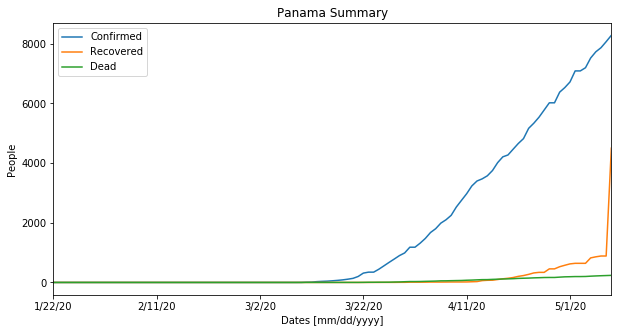

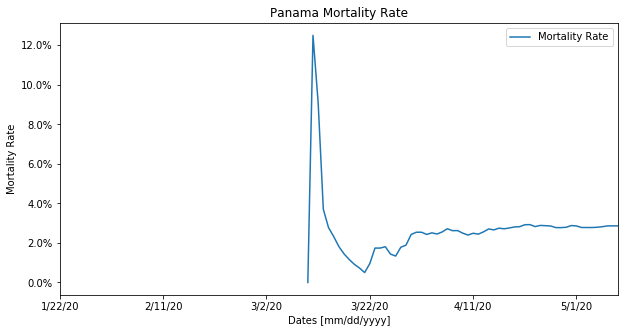

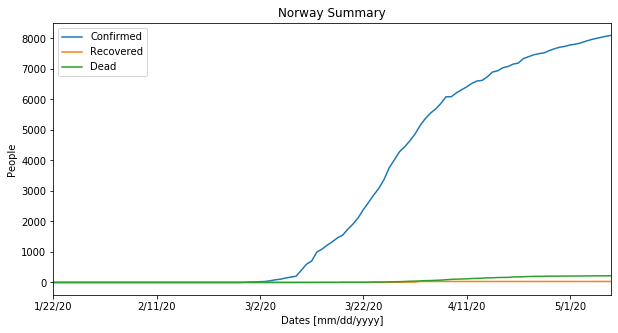

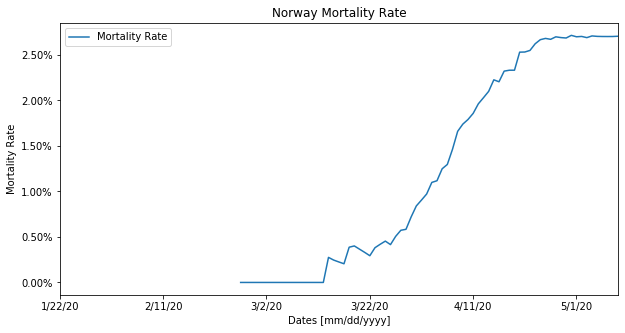

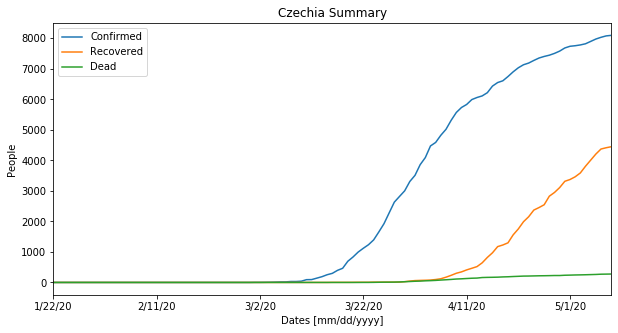

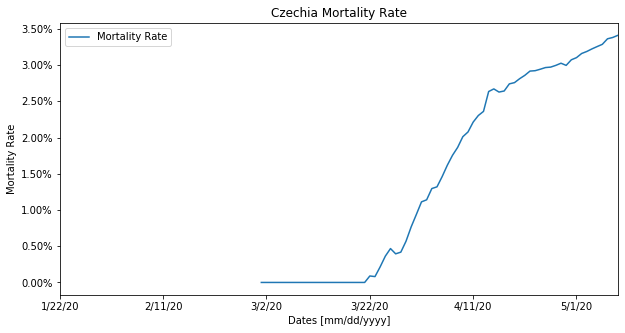

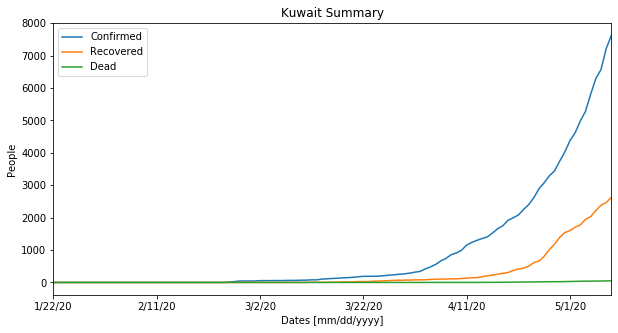

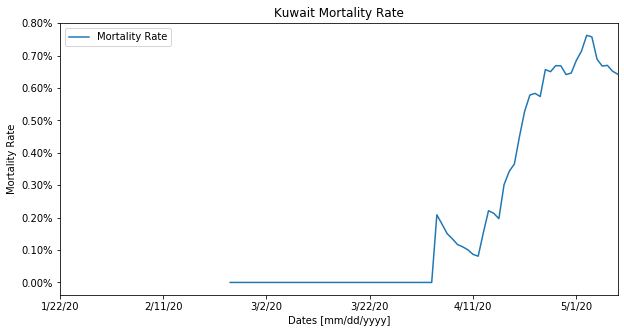

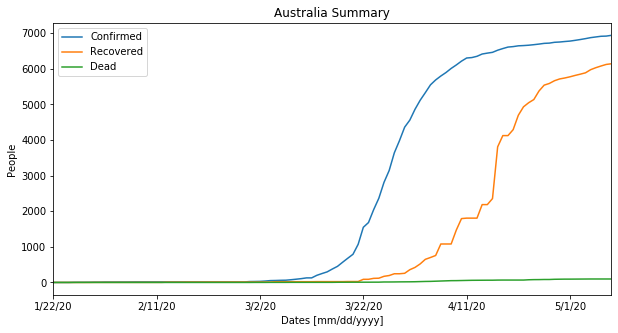

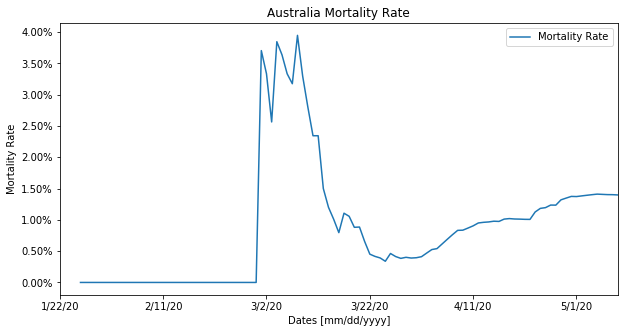

In [9]:
for each_country in top_50_confirmed['Country/Region']:
    
    country=each_country

    confirmed_df=df_Confirmed_agg.loc[country].values.tolist()
    confirmed_df_plot=confirmed_df[2:]

    recovered_df=df_Recovered_agg.loc[country].values.tolist()
    recovered_df_plot=recovered_df[2:]

    Death_df=df_Deaths_agg.loc[country].values.tolist()
    Death_df_plot=Death_df[2:]
    
    a=np.array(confirmed_df_plot)
    b=np.array(Death_df_plot)

    mortality_rate=list((b/a)*100)


    Top_50_df=pd.DataFrame({
                            'Dates':dates_to_plot,
                            'Confirmed':confirmed_df_plot,
                            'Recovered':recovered_df_plot,
                            'Dead':Death_df_plot,
                            'Mortality Rate':mortality_rate
                              })
    
    top_50_plt=Top_50_df.plot(kind='line',x='Dates',y=['Confirmed','Recovered','Dead'],figsize=(10,5),title=country+' Summary')
    top_50_plt.set_ylabel('People')
    top_50_plt.set_xlabel('Dates [mm/dd/yyyy]')
    
    top_50_plt=Top_50_df.plot(kind='line',x='Dates',y=['Mortality Rate'],figsize=(10,5),title=country+' Mortality Rate')
    top_50_plt.set_ylabel('Mortality Rate')
    top_50_plt.set_xlabel('Dates [mm/dd/yyyy]')
    top_50_plt.yaxis.set_major_formatter(mtick.PercentFormatter())

